In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import skew, kurtosis
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit



In [2]:
# Concat the differntial pressure dataset
drill_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp1.csv',header=None)
drill_2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp2.csv', header=None)
drill_4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp4.csv',header=None)
drill_5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp5.csv', header=None)
drill_6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp6.csv',header=None)
drill_pd = pd.concat([drill_1,drill_2,drill_4,drill_5,drill_6], ignore_index=True)

#Concat the pin dataset

drill_pin1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin1.csv',header=None)
drill_pin2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin2.csv',header=None)
drill_pin4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin4.csv',header=None)
drill_pin5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin5.csv',header=None)
drill_pin6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin6.csv',header=None)
drill_pin = pd.concat([drill_pin1,drill_pin2,drill_pin4,drill_pin5,drill_pin6], ignore_index=True)

# Concat the po dataset

drill_po1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po1.csv',header=None)
drill_po2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po2.csv',header=None)
drill_po4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po4.csv',header=None)
drill_po5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin5.csv',header=None)
drill_po6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin6.csv',header=None)
drill_po = pd.concat([drill_po1,drill_po2,drill_po4,drill_po5,drill_po6], ignore_index=True)

Target= drill_pd.iloc[:,0]
pd_data = drill_pd.iloc[:,1:].dropna(axis=1)
pin_data = drill_pin.iloc[:,1:].dropna(axis=1)
po_data = drill_po.iloc[:,1:].dropna(axis=1)

In [3]:
test_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp3.csv',header=None)
test_2 =  pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin3.csv',header=None)
test_3 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po3.csv',header=None)

#Target feature
df_target= test_1.iloc[:,0]
test_1 = test_1.iloc[:,1:].dropna(axis=1)
test_2 = test_2.iloc[:,1:].dropna(axis=1)
test_3 = test_3.iloc[:,1:].dropna(axis=1)

In [4]:
kal = pd_data.iloc[1,:]
kal

1     -0.042587
2     -0.045059
3     -0.045078
4     -0.041949
5     -0.034948
         ...   
567    0.000779
568    0.012435
569    0.005959
570   -0.019395
571   -0.061703
Name: 1, Length: 571, dtype: float64

In [5]:
print(len(pd_data))

34045


In [34]:
# Feature extraction function
def extract_features(data):
    features = []
    for i in range(len(data)):
        mean_features = np.mean(pd_data.iloc[i,:].values)
        std_features = np.std(pd_data.iloc[i,:].values)
        skewness_features = pd.Series(pd_data.iloc[i,:].values).skew()
        kurtosis_features = pd.Series(pd_data.iloc[i,:].values).kurtosis()
        
        features.append(np.percentile(series, 25))  # 25th percentile
        features.append(np.percentile(series, 75))  # 75th percentile
        features.append(np.ptp(series))  # Peak-to-peak range
        features.append(np.sqrt(np.mean(series**2)))  # Root Mean Square (RMS)
        features.append(entropy(pd_data))  # Entropy
        
        # Frequency domain features
        fft_vals = np.abs(fft(pd_data))[:len(pd_data)//2]  # FFT and take positive frequencies
        features.append(np.mean(fft_vals))  # Mean of FFT
        features.append(np.std(fft_vals))   # STD of FFT
        features.append(skew(fft_vals))     # Skewness of FFT
        features.append(kurtosis(fft_vals)) # Kurtosis of FFT # If skewness or kurtosis are NaN, replace with 0
        if np.isnan(skewness_features):
            skewness_features = 0
        if np.isnan(kurtosis_features):
            kurtosis_features = 0
        
        features.append([mean_features, std_features, skewness_features, kurtosis_features])
    return np.array(features)

# Extract features from the combined data
X = extract_features(pd_data)

# Verify the shape of the feature set
print("Shape of feature set:", X.shape)  # Should be (number_of_samples, number_of_features)


Shape of feature set: (34045, 4)


In [37]:
pin_data_features = extract_features(pin_data)
po_data_features = extract_features(po_data)

In [39]:
combined_data = np.hstack((X,pin_data_features,po_data_features))
combined_data

array([[-1.89556988e-02,  1.04246693e+00,  8.94233133e-02, ...,
         1.04246693e+00,  8.94233133e-02, -8.33534648e-01],
       [-5.09167601e-03,  1.11488686e+00,  1.45645648e+00, ...,
         1.11488686e+00,  1.45645648e+00,  3.33534974e+00],
       [ 2.63568126e-03,  1.11135826e+00,  1.70106546e+00, ...,
         1.11135826e+00,  1.70106546e+00,  4.40521130e+00],
       ...,
       [-7.11215061e-03,  1.01021415e+00, -5.84143956e-01, ...,
         1.01021415e+00, -5.84143956e-01, -7.67330527e-01],
       [ 6.10875657e-04,  1.07955277e+00,  7.20581914e-01, ...,
         1.07955277e+00,  7.20581914e-01,  1.94249190e+00],
       [ 1.01850963e-02,  1.07675729e+00,  1.23469045e+00, ...,
         1.07675729e+00,  1.23469045e+00,  2.81900357e+00]])

In [44]:
t1 = extract_features(test_1)
t2 = extract_features(test_2)
t3 = extract_features(test_3)
t_comb = np.hstack((t1,t2,t3))

In [45]:
t_comb.shape

(3184, 12)

In [41]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = combined_data
y = Target.values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')
report = classification_report(y_val,y_pred)


Validation Accuracy: 0.7725069760610956


In [43]:
report

'              precision    recall  f1-score   support\n\n           1       0.62      0.60      0.61       605\n           2       1.00      1.00      1.00       698\n           3       0.76      0.82      0.79       614\n           4       0.98      0.98      0.98       620\n           5       0.60      0.61      0.60       615\n           6       0.90      0.92      0.91       612\n           7       0.77      0.80      0.78       631\n           8       0.80      0.82      0.81       624\n           9       0.82      0.80      0.81       611\n          10       0.57      0.47      0.51       538\n          11       0.59      0.61      0.60       641\n\n    accuracy                           0.77      6809\n   macro avg       0.77      0.77      0.77      6809\nweighted avg       0.77      0.77      0.77      6809\n'

array([[  1.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.],
       [  3.,   0.,   0.,   0.],
       ...,
       [569.,   0.,   0.,   0.],
       [570.,   0.,   0.,   0.],
       [571.,   0.,   0.,   0.]])

In [9]:
pd_data_t = pd_data.transpose()

In [20]:
pd_arr= extract_features(pd_data_t)
pd_arr.shape

(34045, 4)

SOlution through skewness and Kurtosis

Fourier Transform

In [14]:
pd_data_arr = np.array(pd_data)
pin_data_arr = np.array(pin_data)
po_data_arr = np.array(po_data)
Target_arr = np.array(Target)
print(pd_data_arr.shape,pin_data_arr.shape,po_data_arr.shape)

(34045, 571) (34045, 571) (34045, 571)


In [25]:
# Apply FFT to each row of each dataset
fft_pd = np.array([fft(row) for row in pd_data_arr])
fft_pin = np.array([fft(row) for row in pin_data_arr])
fft_po = np.array([fft(row) for row in po_data_arr])

# Get the magnitudes of the FFT results
fft_magnitudes_pd = np.abs(fft_pd)
fft_magnitudes_pin = np.abs(fft_pin)
fft_magnitudes_po = np.abs(fft_po)

# Use only the first half of the FFT results (unique frequencies)
fft_magnitudes_pd = fft_magnitudes_pd[:, :fft_magnitudes_pd.shape[1] // 2]
fft_magnitudes_pin = fft_magnitudes_pin[:, :fft_magnitudes_pin.shape[1] // 2]
fft_magnitudes_po = fft_magnitudes_po[:, :fft_magnitudes_po.shape[1] // 2]


Max point of magnitude

In [87]:
# Apply FFT to each row of each dataset and extract maximum magnitude
fft_max_pd = np.array([np.max(np.abs(fft(row))) for row in pd_data_arr])
fft_max_pin = np.array([np.max(np.abs(fft(row))) for row in pin_data_arr])
fft_max_po = np.array([np.max(np.abs(fft(row))) for row in po_data_arr])

# Stack the maximum points as features
features = np.vstack((fft_max_pd, fft_max_pin, fft_max_po)).T

# Print shape to verify
print(features.shape)  # Should be (34045, 3)


(34045, 3)


In [105]:
# Example: Use the first few FFT magnitudes as features
num_features = 1  # Select the number of features from each sensor

features_pd = fft_magnitudes_pd[:, :num_features]
features_pin = fft_magnitudes_pin[:, :num_features]
features_po = fft_magnitudes_po[:, :num_features]

# Concatenate features from all sensors
features = np.hstack((features_pd, features_pin, features_po))

# Print shape to verify
print(features.shape)  # Should be (34045, num_features * 3)


(34045, 3)


In [88]:
labels = np.array(Target_arr)  # Ensure labels are in a numpy array

# Check the shape of the features and labels
print(features.shape, labels.shape)


(34045, 3) (34045,)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Initialize the classifier
dlf = RandomForestClassifier(random_state=42)

# Train the classifier
dlf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dlf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


(27236, 3) (6809, 3) (27236,) (6809,)
Accuracy: 0.5272433543839037
Classification Report:
              precision    recall  f1-score   support

           1       0.34      0.35      0.35       603
           2       0.85      0.88      0.86       713
           3       0.58      0.53      0.55       649
           4       0.62      0.67      0.65       599
           5       0.35      0.39      0.37       612
           6       0.65      0.56      0.60       614
           7       0.43      0.46      0.44       616
           8       0.38      0.40      0.39       594
           9       0.41      0.39      0.40       604
          10       0.32      0.24      0.28       573
          11       0.76      0.83      0.79       632

    accuracy                           0.53      6809
   macro avg       0.52      0.52      0.52      6809
weighted avg       0.52      0.53      0.52      6809



max point above

In [83]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters found: {best_params}')
print(f'Best cross-validation score: {best_score}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9849463000420282


In [89]:
# Initialize the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9860478778087824
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       603
           2       1.00      1.00      1.00       713
           3       1.00      1.00      1.00       649
           4       1.00      1.00      1.00       599
           5       0.97      0.99      0.98       612
           6       1.00      1.00      1.00       614
           7       0.97      0.96      0.96       616
           8       0.95      0.96      0.96       594
           9       1.00      0.99      1.00       604
          10       0.98      0.98      0.98       573
          11       1.00      1.00      1.00       632

    accuracy                           0.99      6809
   macro avg       0.99      0.99      0.99      6809
weighted avg       0.99      0.99      0.99      6809



In [90]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 20 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(features, labels)

# Split the new feature set
X_train, X_test, y_train, y_test = train_test_split(X_new, labels, test_size=0.2, random_state=42)


# Initialize the gradient boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Accuracy: 0.6469378763401381
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.55      0.53       603
           2       1.00      1.00      1.00       713
           3       0.57      0.51      0.54       649
           4       0.65      0.54      0.59       599
           5       0.48      0.60      0.53       612
           6       0.72      0.80      0.76       614
           7       0.57      0.66      0.61       616
           8       0.51      0.48      0.50       594
           9       0.56      0.44      0.49       604
          10       0.59      0.55      0.57       573
          11       0.89      0.91      0.90       632

    accuracy                           0.65      6809
   macro avg       0.64      0.64      0.64      6809
weighted avg       0.65      0.65      0.64      6809



In [75]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with regularization
clf_log = LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=10000)

# Train the classifier
clf_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_log.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9640182111910707
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.88      0.90       603
           2       1.00      1.00      1.00       713
           3       0.99      0.99      0.99       649
           4       1.00      1.00      1.00       599
           5       0.93      0.95      0.94       612
           6       1.00      1.00      1.00       614
           7       0.91      0.93      0.92       616
           8       0.92      0.91      0.92       594
           9       0.98      0.99      0.99       604
          10       0.94      0.94      0.94       573
          11       1.00      1.00      1.00       632

    accuracy                           0.96      6809
   macro avg       0.96      0.96      0.96      6809
weighted avg       0.96      0.96      0.96      6809



c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier
clf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf_cv, features, labels, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')


Cross-validation scores: [0.98516669 0.9735644  0.98560728 0.97943898 0.7996769 ]
Mean cross-validation score: 0.9446908503451313


In [61]:
test_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp3.csv',header=None)
test_2 =  pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin3.csv',header=None)
test_3 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po3.csv',header=None)

#Target feature
df_target= test_1.iloc[:,0]
test_1 = test_1.iloc[:,1:].dropna(axis=1)
test_2 = test_2.iloc[:,1:].dropna(axis=1)
test_3 = test_3.iloc[:,1:].dropna(axis=1)

In [63]:
test_1_arr = np.array(test_1)
test_2_arr = np.array(test_2)
test_3_arr = np.array(test_3)
#Target_arr = np.array(Target)
print(test_1_arr.shape,test_2_arr.shape,test_3_arr.shape)

(3184, 594) (3184, 594) (3184, 594)


In [99]:
# Apply FFT to each row of each dataset
fft_pd_t = np.array([fft(row) for row in test_1_arr])
fft_pin_t = np.array([fft(row) for row in test_2_arr])
fft_po_t = np.array([fft(row) for row in test_3_arr])

# Get the magnitudes of the FFT results
fft_magnitudes_pd_t = np.abs(fft_pd_t)
fft_magnitudes_pin_t = np.abs(fft_pin_t)
fft_magnitudes_po_t = np.abs(fft_po_t)

# Use only the first half of the FFT results (unique frequencies)
fft_magnitudes_pd_t = fft_magnitudes_pd_t[:, :fft_magnitudes_pd_t.shape[1] // 2]
fft_magnitudes_pin_t = fft_magnitudes_pin_t[:, :fft_magnitudes_pin_t.shape[1] // 2]
fft_magnitudes_po_t = fft_magnitudes_po_t[:, :fft_magnitudes_po_t.shape[1] // 2]


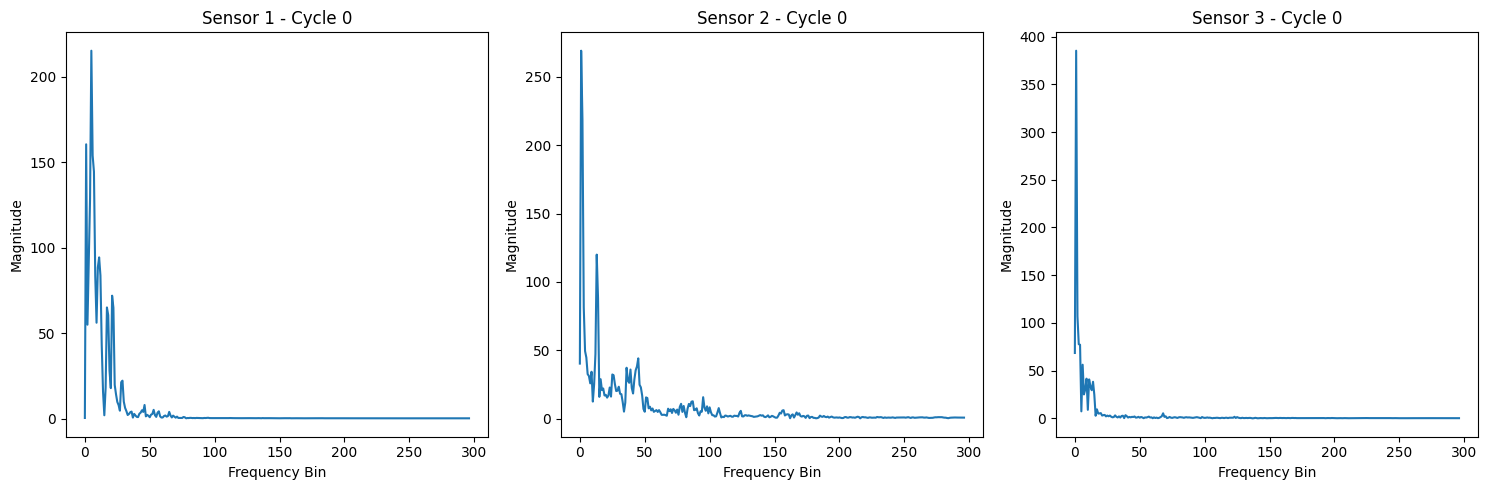

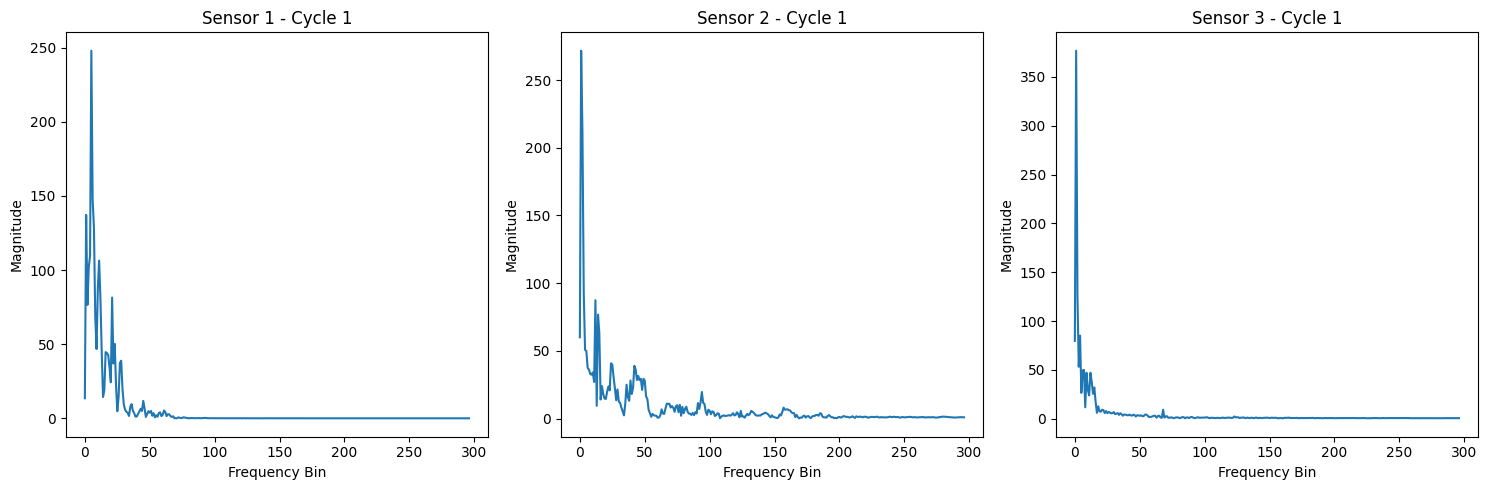

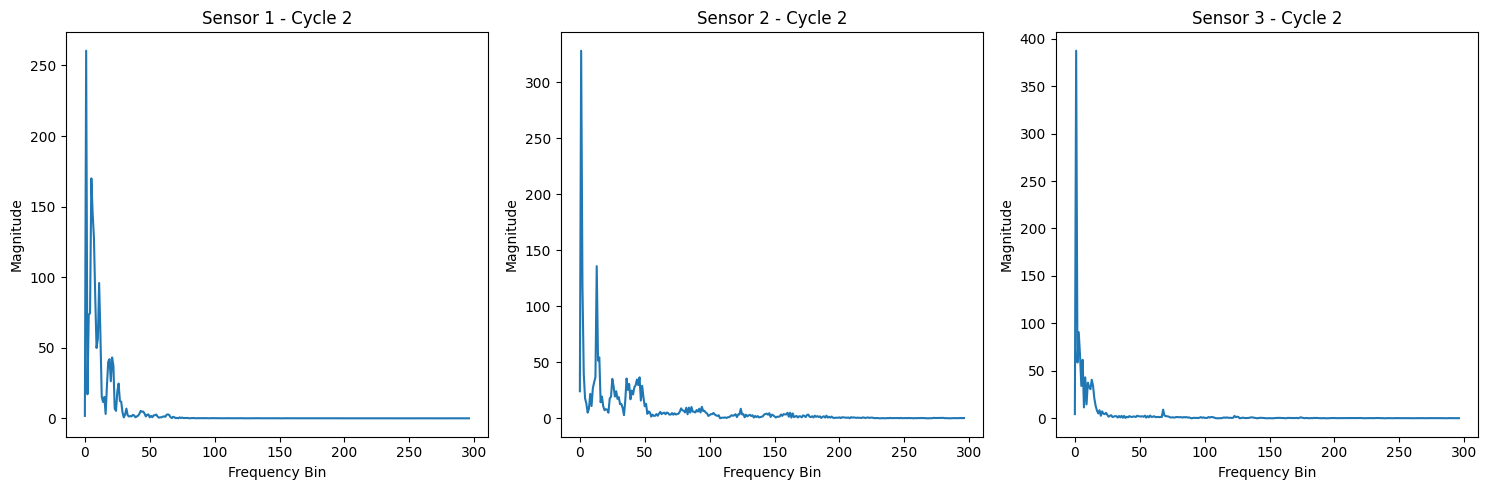

In [100]:
import matplotlib.pyplot as plt

# Select a few samples to visualize
sample_indices = [0, 1, 2]  # Adjust these indices as needed

for idx in sample_indices:
    plt.figure(figsize=(15, 5))
    
    # Plot for Sensor 1
    plt.subplot(1, 3, 1)
    plt.plot(fft_magnitudes_pd_t[idx])
    plt.title(f'Sensor 1 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    # Plot for Sensor 2
    plt.subplot(1, 3, 2)
    plt.plot(fft_magnitudes_pin_t[idx])
    plt.title(f'Sensor 2 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    # Plot for Sensor 3
    plt.subplot(1, 3, 3)
    plt.plot(fft_magnitudes_po_t[idx])
    plt.title(f'Sensor 3 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6159494786312234
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.53      0.45       603
           2       1.00      1.00      1.00       713
           3       0.48      0.51      0.49       649
           4       0.58      0.57      0.57       599
           5       0.46      0.50      0.48       612
           6       0.75      0.76      0.76       614
           7       0.58      0.64      0.61       616
           8       0.49      0.42      0.45       594
           9       0.52      0.39      0.44       604
          10       0.62      0.47      0.53       573
          11       0.90      0.90      0.90       632

    accuracy                           0.62      6809
   macro avg       0.61      0.61      0.61      6809
weighted avg       0.62      0.62      0.62      6809



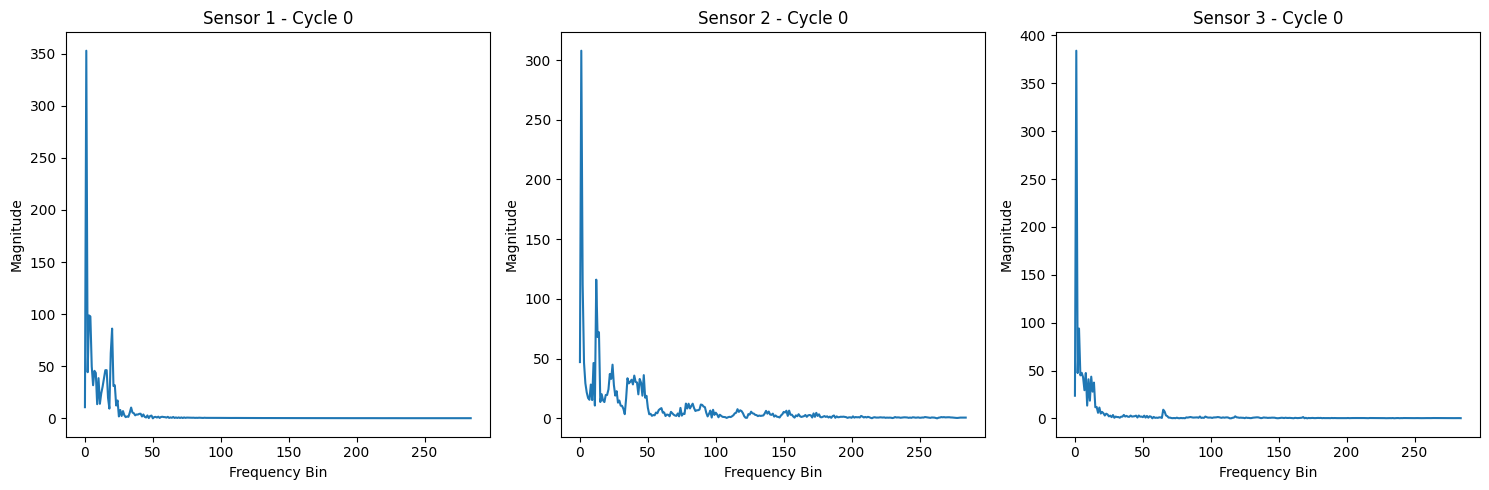

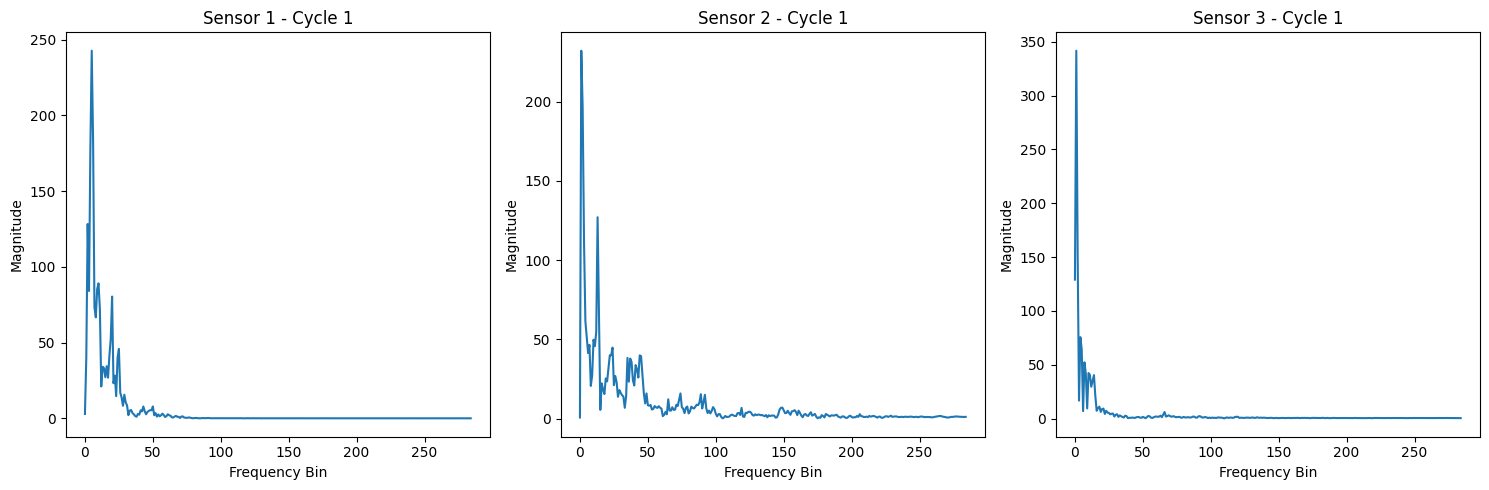

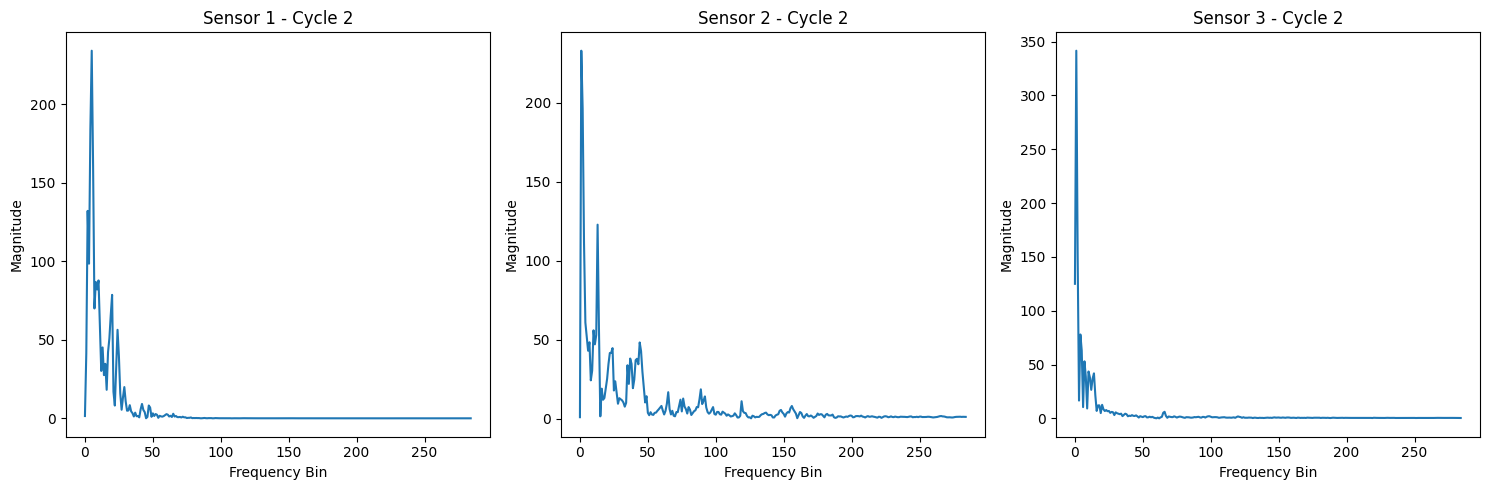

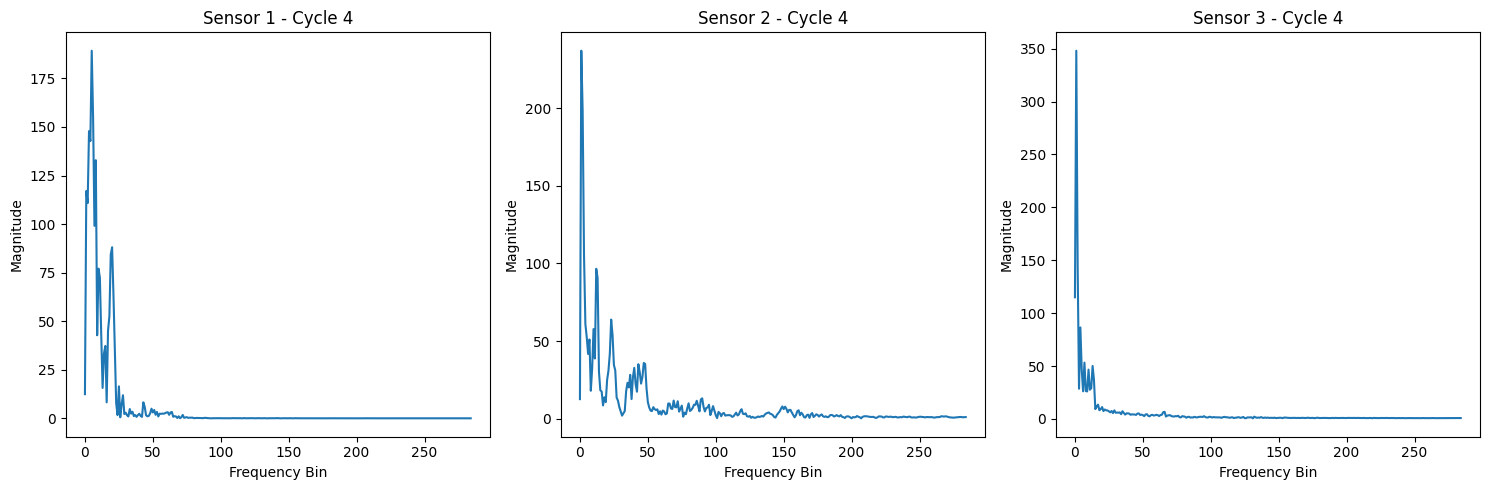

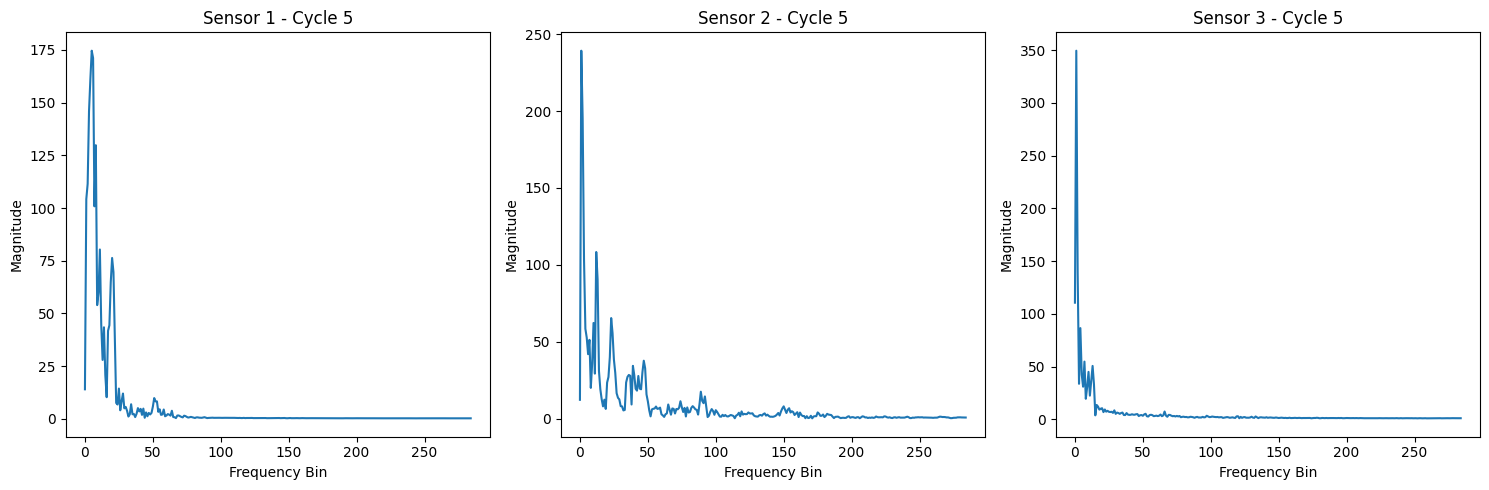

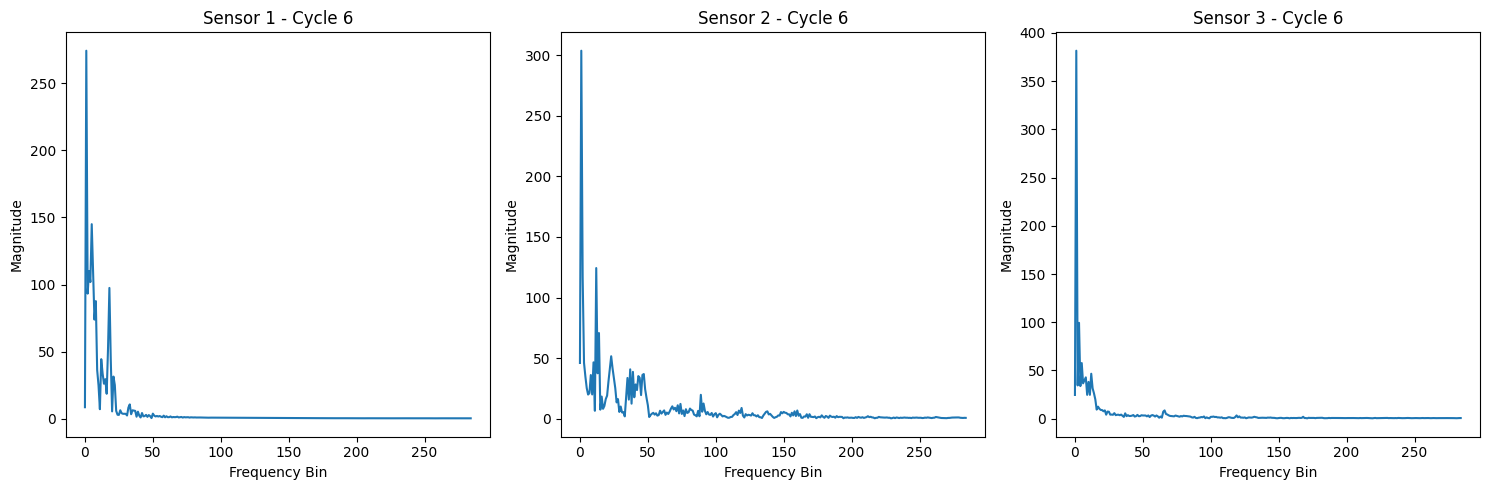

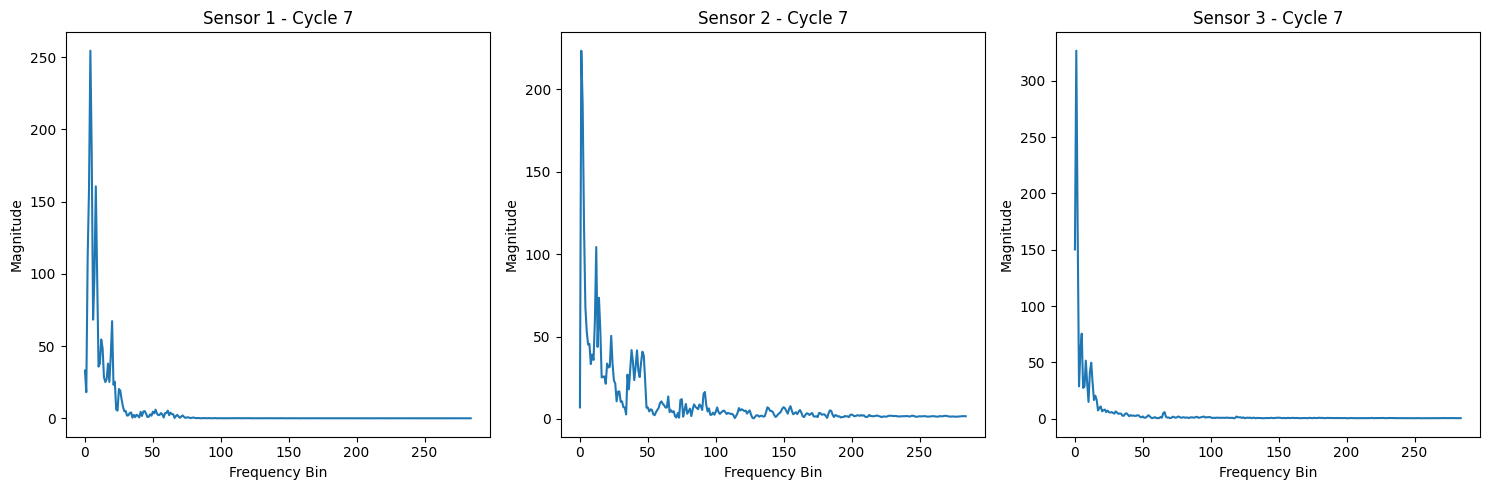

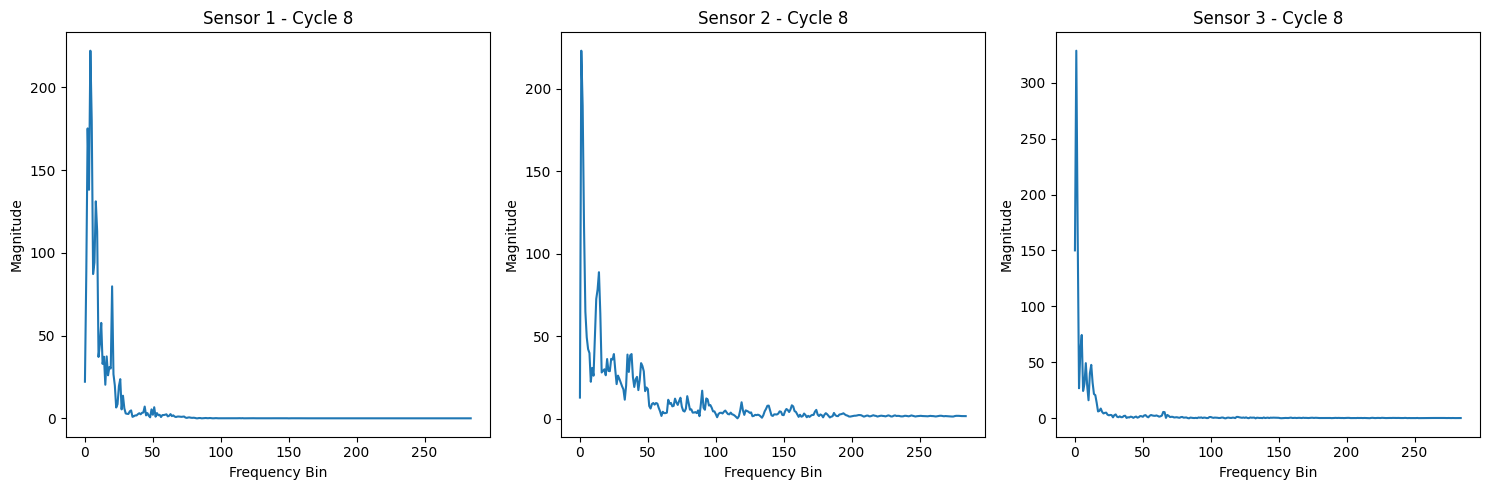

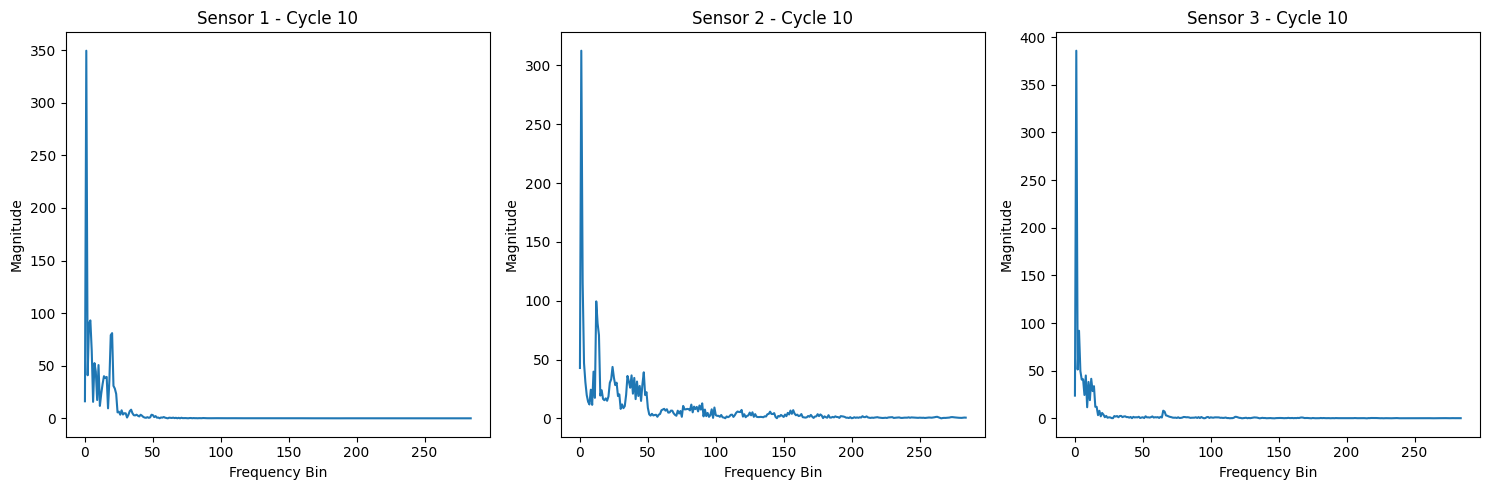

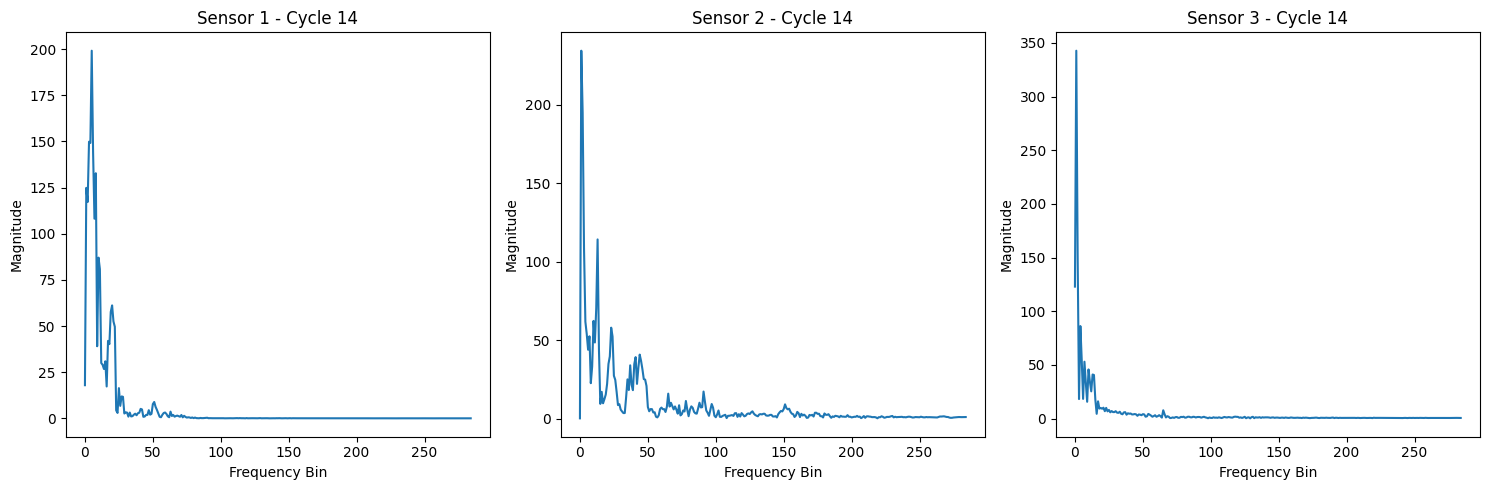

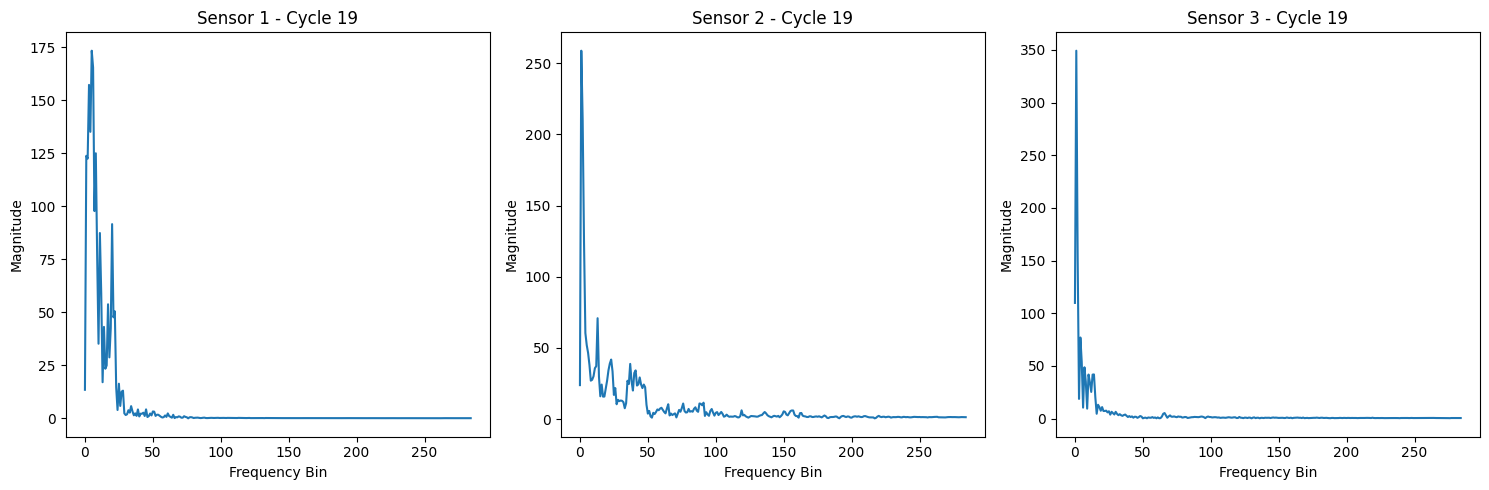

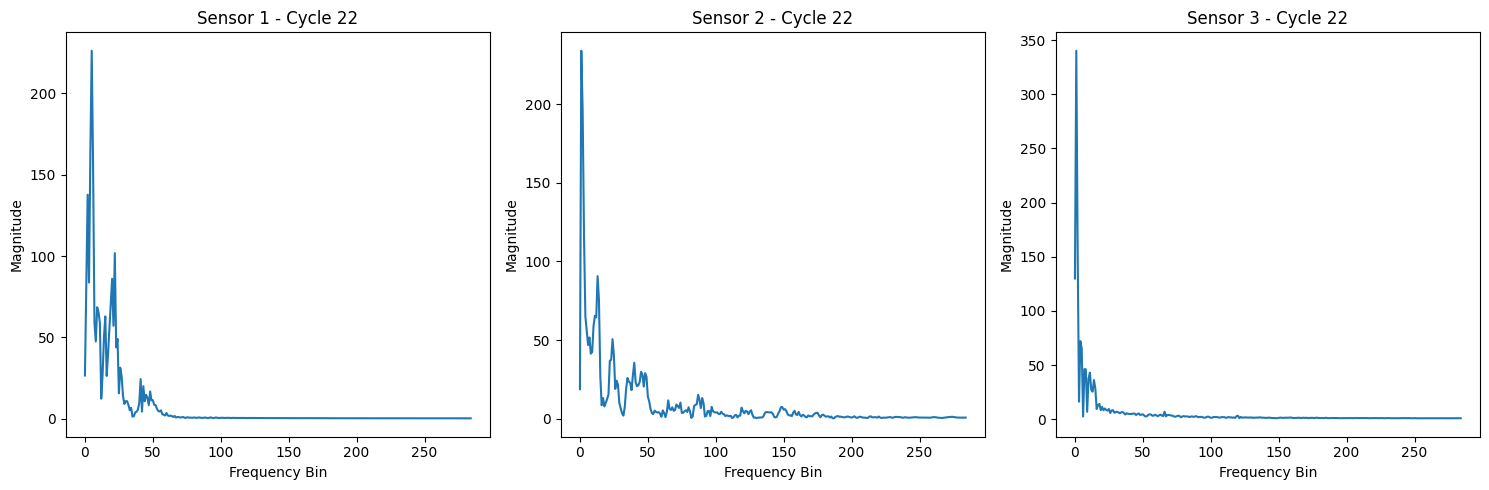

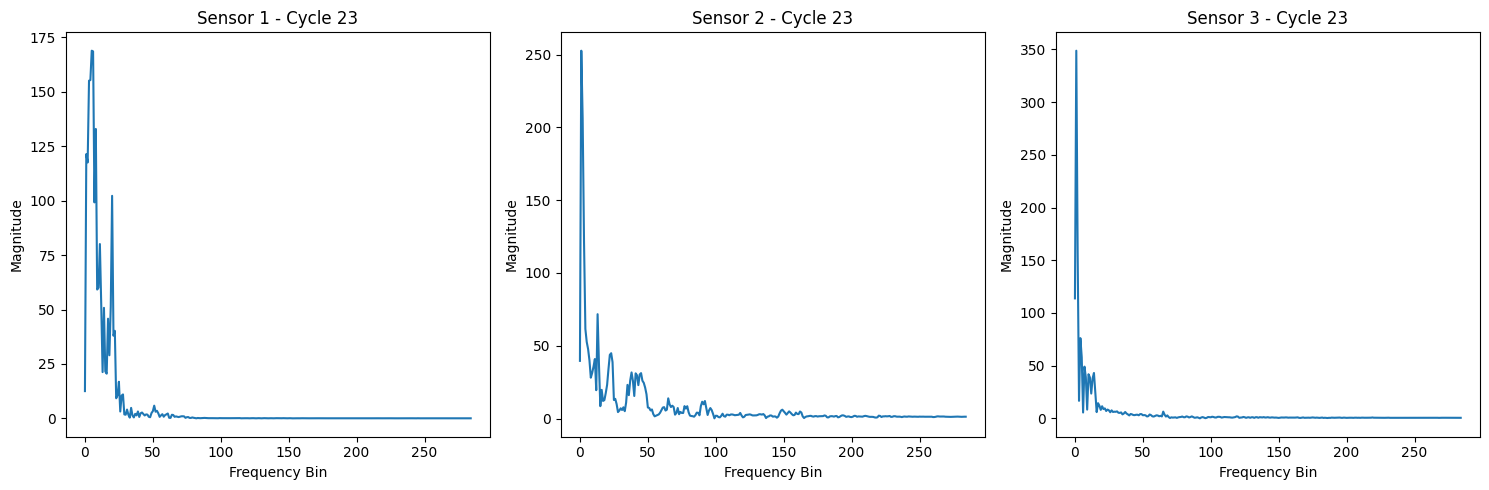

In [102]:
# Select a few samples
sample_indices = [0, 1, 2,4,5,6,7,8,10,14,19,22,23]  # Change these indices to plot different samples

# Plot FFT magnitudes for each sensor
for idx in sample_indices:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(fft_magnitudes_pd[idx])
    plt.title(f'Sensor 1 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    plt.subplot(1, 3, 2)
    plt.plot(fft_magnitudes_pin[idx])
    plt.title(f'Sensor 2 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    plt.subplot(1, 3, 3)
    plt.plot(fft_magnitudes_po[idx])
    plt.title(f'Sensor 3 - Cycle {idx}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()


max point of fft

In [91]:
# Apply FFT to each row of each dataset and extract maximum magnitude
fft_max_pd_t = np.array([np.max(np.abs(fft(row))) for row in test_1_arr])
fft_max_pin_t = np.array([np.max(np.abs(fft(row))) for row in test_2_arr])
fft_max_po_t = np.array([np.max(np.abs(fft(row))) for row in test_3_arr])

# Stack the maximum points as features
features_t = np.vstack((fft_max_pd_t, fft_max_pin_t, fft_max_po_t)).T

# Print shape to verify
print(features_t.shape)  # Should be (34045, 3)

(3184, 3)


In [66]:
# Example: Use the first few FFT magnitudes as features
num_features = 10  # Select the number of features from each sensor

features_pd_t = fft_magnitudes_pd_t[:, :num_features]
features_pin_t = fft_magnitudes_pin_t[:, :num_features]
features_po_t = fft_magnitudes_po_t[:, :num_features]

# Concatenate features from all sensors
features_t = np.hstack((features_pd_t, features_pin_t, features_po_t))

# Print shape to verify
print(features_t.shape)  # Should be (34045, num_features * 3)



(3184, 30)


ValueError: Found input variables with inconsistent numbers of samples: [3184, 34045]

In [104]:
y_pred_t = knn.predict(features_t)
y_pred_t_df = pd.DataFrame(y_pred_t,columns=['fault'])
y_pred_t_df['fault'].unique()
y_pred_t_df.to_csv('submission94.csv')

ValueError: x and y must have same first dimension, but have shapes (285,) and (1, 571)

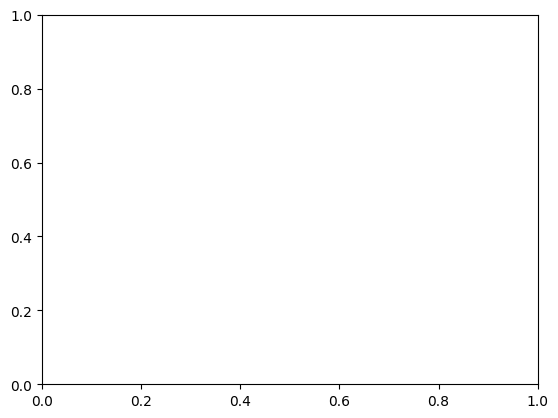

In [6]:
import matplotlib.pyplot as plt

# Assume a sample rate (you need to set this according to your data)
sample_rate = 800.0
N = pd_data_arr.shape[1]  # Assuming each cycle has N points

# Frequency axis
frequencies = np.fft.fftfreq(N, d=1/sample_rate)

# Plot the FFT magnitudes of the first cycle
plt.figure()
plt.plot(frequencies[:N//2], fft_magnitudes[0][:N//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitudes of the First Cycle')
plt.grid()
plt.show()


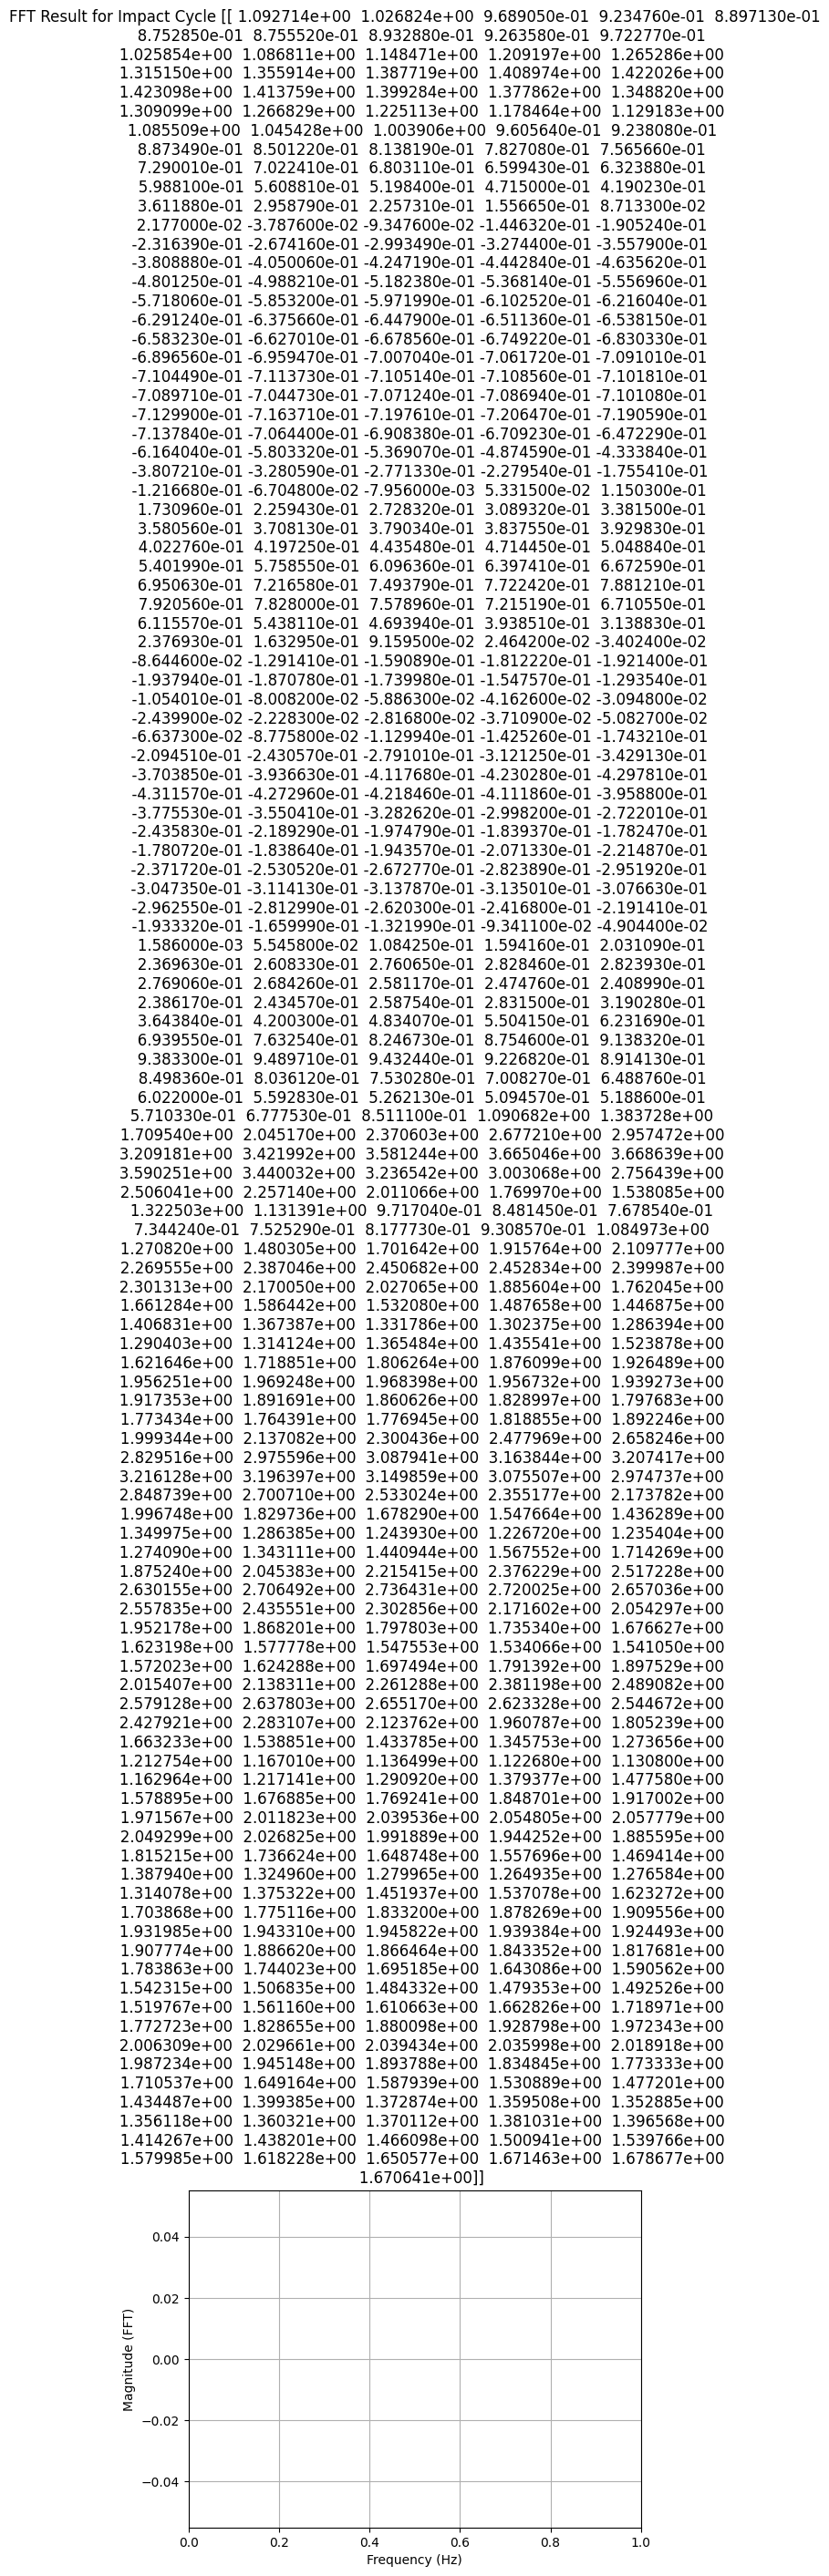

In [81]:
import matplotlib.pyplot as plt
from scipy.fft import fft

# Assuming you have:
# - pd_data_arr: Your Pandas DataFrame containing sensor data
# - selected_cycle_index: Index of the impact cycle you want to visualize (e.g., 0 for the first cycle)

# Split data into separate arrays for each impact cycle
impact_cycles = np.split(pd_data_arr, pd_data_arr.shape[0], axis=0)  # Assuming 'values' attribute holds numerical data

# Get the FFT result for the selected cycle
selected_cycle_fft = fft(impact_cycles[0])

# Sample rate (assuming you know your sampling rate)
sampling_rate = 5 # Your sensor's sampling rate (e.g., Hz)

# Calculate absolute values of the first half (assuming real signal)
fft_abs = np.abs(selected_cycle_fft[:len(selected_cycle_fft)//2])

# Frequency range (considerations explained below)
frequencies = np.linspace(0, sampling_rate/2, len(fft_abs))  # Up to half the sampling rate

# Plot the results
plt.plot(frequencies, fft_abs)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (FFT)')
plt.title('FFT Result for Impact Cycle {}'.format(impact_cycles[0] + 1))  # Add cycle number
plt.xlim(0, sampling_rate/5)  # Optional: Limit x-axis for better visualization (adjust as needed)
plt.grid(True)
plt.show()


Calculating the Differencial Pressure

In [39]:
import pandas as pd


def pressure_change(dataset):
  """
  Calculates pairwise differences between consecutive columns for each row in a DataFrame.

  Args:
      dataset (pandas.DataFrame): The input DataFrame containing data.

  Returns:
      pandas.DataFrame: A new DataFrame with a column named 'difference' containing 
          the pairwise differences for each row.

  Raises:
      ValueError: If the input is not a pandas DataFrame.
  """

  if not isinstance(dataset, pd.DataFrame):
    raise ValueError("Input must be a pandas DataFrame.")

  result_df = pd.DataFrame(columns=['row_index', 'difference'])

  for row_index in dataset.index:
    row_data = dataset.iloc[row_index]
    differences = []
    for i in range(1, len(row_data)):
      differences.append(row_data.iloc[i] - row_data.iloc[i - 1])
    result_df.loc[len(result_df)] = [row_index, differences]

  return result_df





In [ ]:
x = pressure_change(pd_data)

In [40]:

y = pressure_change(pin_data)
z = pressure_change(po_data)

In [6]:
test_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp3.csv',header=None)
test_2 =  pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin3.csv',header=None)
test_3 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po3.csv',header=None)

#Target feature
df_target= test_1.iloc[:,0]
test_1 = test_1.iloc[:,1:]
test_2 = test_2.iloc[:,1:]
test_3 = test_3.iloc[:,1:]

In [77]:
x1 = pressure_change(test_1)
x2 = pressure_change(test_2)
x3 = pressure_change(test_3)

In [78]:
df1 =pd.DataFrame(columns=['pd_min','pd_max','pin_min','pin_max','po_min','po_max'])
df1['pd_min'] = x1['difference'].apply(min)
df1['pd_max'] = x1['difference'].apply(max)
df1['pin_max'] = x2['difference'].apply(max)
df1['pin_min'] = x2['difference'].apply(min)
df1['po_max'] = x3['difference'].apply(max)
df1['po_min'] = x3['difference'].apply(min)

In [79]:
df1

,pd_min,pd_max,pin_min,pin_max,po_min,po_max
0,-0.302098,0.581866,-1.114854,1.145252,-0.172056,0.138737
1,-0.346463,0.604002,-1.391903,1.051401,-0.210233,0.147511
2,-0.220305,0.332513,-1.072110,0.994891,-0.162900,0.160564
3,-0.272978,0.542347,-1.355072,1.269696,-0.202173,0.159405
4,-0.297445,0.547639,-1.188428,1.142247,-0.181962,0.170225
...,...,...,...,...,...,...
3179,-0.270811,0.536347,-1.327322,1.137274,-0.219028,0.152889
3180,-0.301674,0.572446,-1.317287,1.145741,-0.205273,0.160584
3181,-0.327592,0.568482,-1.416298,1.054585,-0.210994,0.145749
3182,-0.150219,0.266192,-1.031434,1.094662,-0.143907,0.180565


In [61]:
y1=pressure_change(pin_data)

In [70]:
import pandas as pd


def process_data(x, y1, z):
  """
  Calculates minimum and maximum values row-wise for three DataFrames and adds them to a new DataFrame.

  Args:
      x (pandas.DataFrame): The first DataFrame containing data.
      y1 (pandas.DataFrame): The second DataFrame containing data.
      z (pandas.DataFrame): The third DataFrame containing data.

  Returns:
      pandas.DataFrame: A new DataFrame with columns 'pd_min', 'pd_max', 'pin_min', 'pin_max', 'po_min', and 'po_max' 
          containing the minimum values from each row of the input DataFrames.

  Raises:
      ValueError: If any input is not a pandas DataFrame or if the DataFrames have different lengths (number of rows).
  """

  # ... (rest of the code)

  df = pd.DataFrame(columns=['pd_min', 'pd_max', 'pin_min', 'pin_max', 'po_min', 'po_max'])

  for i in range(len(x)):
    df.loc[i] = [
        x.loc[i, 'difference'].min(),  # Get minimum from the Series in 'difference'
        x.loc[i, 'difference'].max(),  # Get maximum from the Series in 'difference'
        y1.loc[i, 'difference'].min() if pd.notnull(y1.loc[i, 'difference']).any() else None,  # Handle potential NaNs (optional)
        y1.loc[i, 'difference'].max() if pd.notnull(y1.loc[i, 'difference']).any() else None,  # Handle potential NaNs (optional)
        z.loc[i, 'difference'].min() if pd.notnull(z.loc[i, 'difference']).any() else None,  # Handle potential NaNs (optional)
        z.loc[i, 'difference'].max() if pd.notnull(z.loc[i, 'difference']).any() else None,  # Handle potential NaNs (optional)
    ]

  return df




In [72]:
x

,row_index,difference
0,0,"[-0.06589, -0.057919, -0.045429, -0.033763, -0..."
1,1,"[-0.002472000000000002, -1.8999999999998185e-0..."
2,2,"[0.021506, 0.015105, 0.010654999999999998, 0.0..."
3,3,"[-0.014129000000000003, -0.011249999999999996,..."
4,4,"[0.019638, 0.024653999999999995, 0.025465, 0.0..."
...,...,...
34040,34040,"[-0.012878, -0.012336999999999997, -0.01331100..."
34041,34041,"[-0.016913999999999985, -0.012031000000000014,..."
34042,34042,"[-0.005782999999999983, 0.0009929999999999939,..."
34043,34043,"[0.0003490000000000021, -0.003366999999999995,..."


In [71]:
df = process_data(x,y1,z)

AttributeError: 'list' object has no attribute 'min'

In [73]:
df =pd.DataFrame(columns=['pd_min','pd_max','pin_min','pin_max','po_min','po_max'])
df['pd_min'] = x['difference'].apply(min)
df['pd_max'] = x['difference'].apply(max)
df['pin_max'] = y1['difference'].apply(max)
df['pin_min'] = y1['difference'].apply(min)
df['po_max'] = z['difference'].apply(max)
df['po_min'] = z['difference'].apply(min)


In [1]:
df

NameError: name 'df' is not defined

In [47]:
Target

0         2
1         1
2         1
3        11
4         5
         ..
34040     5
34041     8
34042     2
34043     3
34044     6
Name: 0, Length: 34045, dtype: int64

In [50]:
target = Target.to_frame(name='Fault')
target

,Fault
0,2
1,1
2,1
3,11
4,5
...,...
34040,5
34041,8
34042,2
34043,3


In [88]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df and target DataFrames are already defined
# df: your feature DataFrame
# target: your target DataFrame with 'Fault' column

# Extract features and target variable
X = df
y = target['Fault']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.8089876639906012
Confusion Matrix:
 [[ 613    0   46    2  158   20    3    7    2   46    0]
 [   1 1013    1    4    1    0    6    9    0    0   10]
 [  57    0  720    0   48   48    2    9   11   49    0]
 [  17    5    4  883    7    0    0    0    1    1    0]
 [ 211    0   56    1  586   15    4    8    2   60    0]
 [  40    0   38    0    6  791    0   17    0   27    0]
 [   3    0    4    0    4    1  756  159    0    9    4]
 [   7    0   11    0   11   11  184  637    0   23    2]
 [   5    0   19    1    3    0    0    2  877    7    0]
 [  93    0   98    0  119   37   25   45    3  427    0]
 [   0    0    0    0    0    0    0    1    0    0  960]]
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.68      0.63       897
           2       1.00      0.97      0.98      1045
           3       0.72      0.76      0.74       944
           4       0.99      0.96      0.98       918
           5      

In [33]:
import pandas.core.series as Series  # Import Series for clarity
import pandas as pd


def pressure_change(dataset):
  """
  Calculates pairwise differences between consecutive columns for each row, then gets the maximum and minimum values of those differences, and adds them as new columns.

  Args:
      dataset (pandas.DataFrame): The input DataFrame containing data.

  Returns:
      pandas.DataFrame: A new DataFrame with the following columns:
          - 'row_index': Original row index from the input DataFrame.
          - 'difference': A list containing the pairwise differences for that row.
          - 'min_value': The minimum value from the 'difference' list.
          - 'max_value': The maximum value from the 'difference' list.

  Raises:
      ValueError: If the input is not a pandas DataFrame.
  """

  if not isinstance(dataset, pd.DataFrame):
    raise ValueError("Input must be a pandas DataFrame.")

  result_df = pd.DataFrame(columns=['row_index', 'difference', 'min_value', 'max_value'])

  for row_index in dataset.index:
    row_data = dataset.iloc[row_index]
    differences = []
    for i in range(1, len(row_data)):
      differences.append(row_data.iloc[i] - row_data.iloc[i - 1])
    min_value = Series(differences).min()  # Use Series methods
    max_value = Series(differences).max()  # Use Series methods
    result_df.loc[len(result_df)] = [row_index, differences, min_value, max_value]

  return result_df




In [34]:
x = pressure_change(pd_data)

TypeError: 'module' object is not callable

8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

In [2]:
test_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp3.csv',header=None)
test_2 =  pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin3.csv',header=None)
test_3 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po3.csv',header=None)

#Target feature
df_target= test_1.iloc[:,0]
test_1 = test_1.iloc[:,1:]
test_2 = test_2.iloc[:,1:]
test_3 = test_3.iloc[:,1:]
imputer_1 = SimpleImputer(strategy='mean')
test_1_imp = imputer_1.fit_transform(test_1)
test_2_imp = imputer_1.fit_transform(test_2)
test_3_imp = imputer_1.fit_transform(test_3)
pred = np.concatenate([test_1_imp,test_2_imp,test_3_imp],axis=1)


test_1_f = test_1.dropna(axis=1).iloc[:,:571]
test_2_f = test_2.dropna(axis=1).iloc[:,:571]
test_3_f = test_3.dropna(axis=1).iloc[:,:571]
new_column_name = {i: f'P1_reading {i}' for i in range(len(test_1_f.columns))}
test_1_f.rename(columns=new_column_name, inplace=True)

new_colum = {i: f'P2_reading {i}'for i in range(len(test_2_f.columns))}
test_2_f.rename(columns=new_colum,inplace=True)

nw_colum = {i: f' P3_reading {i}' for i in range(len(test_3_f))}
test_3_f.rename(columns=nw_colum, inplace=True)

data_se = pd.merge(test_1_f,test_2_f,left_index=True, right_index=True, how='outer')
test = pd.merge(data_se,test_3_f, left_index=True, right_index=True, how='outer')




In [16]:
print(test_1.shape,test_2.shape,test_3.shape)

(3184, 715) (3184, 715) (3184, 715)


In [13]:
pred

array([[-0.430424  , -0.427879  , -0.420489  , ...,  0.12585008,
         0.18083525,  0.079628  ],
       [-0.013086  , -0.010822  , -0.001646  , ...,  0.12585008,
         0.18083525,  0.079628  ],
       [ 0.154474  ,  0.18588   ,  0.217502  , ...,  0.12585008,
         0.18083525,  0.079628  ],
       ...,
       [ 0.04206   ,  0.068386  ,  0.101277  , ...,  0.12585008,
         0.18083525,  0.079628  ],
       [ 0.153437  ,  0.149004  ,  0.144679  , ...,  0.12585008,
         0.18083525,  0.079628  ],
       [-0.148305  , -0.136189  , -0.129398  , ...,  0.12585008,
         0.18083525,  0.079628  ]])

In [3]:
# Concat the differntial pressure dataset
drill_1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp1.csv',header=None)
drill_2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp2.csv', header=None)
drill_4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp4.csv',header=None)
drill_5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp5.csv', header=None)
drill_6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pdmp6.csv',header=None)
drill_pd = pd.concat([drill_1,drill_2,drill_4,drill_5,drill_6], ignore_index=True)

#Concat the pin dataset

drill_pin1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin1.csv',header=None)
drill_pin2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin2.csv',header=None)
drill_pin4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin4.csv',header=None)
drill_pin5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin5.csv',header=None)
drill_pin6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin6.csv',header=None)
drill_pin = pd.concat([drill_pin1,drill_pin2,drill_pin4,drill_pin5,drill_pin6], ignore_index=True)

# Concat the po dataset

drill_po1 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po1.csv',header=None)
drill_po2 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po2.csv',header=None)
drill_po4 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_po4.csv',header=None)
drill_po5 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin5.csv',header=None)
drill_po6 = pd.read_csv(r'D:\Road Map to AI\Competition\Rock drills\data\data_pin6.csv',header=None)
drill_po = pd.concat([drill_po1,drill_po2,drill_po4,drill_po5,drill_po6], ignore_index=True)

Target= drill_pd.iloc[:,0]
pd_data = drill_pd.iloc[:,1:]
pin_data = drill_pin.iloc[:,1:]
po_data = drill_po.iloc[:,1:]

In [15]:
print(pd_data.shape,pin_data.shape,po_data.shape)

(34045, 748) (34045, 748) (34045, 748)


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
pd_data_imp = imputer.fit_transform(pd_data)
pin_data_imp = imputer.fit_transform(pin_data)
po_data_imp = imputer.fit_transform(po_data)

In [6]:
pd_data_imp

array([[ 0.092714,  0.026824, -0.031095, ...,  0.143673,  0.169147,
         0.179497],
       [-0.042587, -0.045059, -0.045078, ...,  0.143673,  0.169147,
         0.179497],
       [ 0.024032,  0.045538,  0.060643, ...,  0.143673,  0.169147,
         0.179497],
       ...,
       [ 0.179332,  0.173549,  0.174542, ...,  0.143673,  0.169147,
         0.179497],
       [-0.110074, -0.109725, -0.113092, ...,  0.143673,  0.169147,
         0.179497],
       [ 0.254996,  0.250007,  0.240807, ...,  0.143673,  0.169147,
         0.179497]])

In [7]:
# pd_data_arr = pd_data_imp.values
# pin_data_arr = pin_data_imp.values
# po_data_arr = po_data_imp.values
arr_concat = np.concatenate((pd_data_imp,pin_data_imp,po_data_imp), axis=1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in two NumPy arrays: features (containing sensor data) and labels
features =arr_concat
labels = Target.values

# Split data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Define the Random Forest classifier with hyperparameters (adjust as needed)
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate model performance (accuracy in this example)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           1       0.99      0.99      0.99       897
           2       1.00      1.00      1.00      1045
           3       1.00      1.00      1.00       944
           4       1.00      1.00      1.00       918
           5       0.99      1.00      0.99       943
           6       1.00      1.00      1.00       919
           7       0.99      0.98      0.98       940
           8       0.98      0.99      0.98       886
           9       1.00      1.00      1.00       914
          10       1.00      1.00      1.00       847
          11       1.00      1.00      1.00       961

    accuracy                           1.00     10214
   macro avg       1.00      1.00      1.00     10214
weighted avg       1.00      1.00      1.00     10214

Accuracy: 0.9952


In [15]:
from sklearn.

array([2, 1, 1, ..., 2, 3, 6], dtype=int64)

In [41]:
pd_data_null_free = pd_data.dropna(axis=1)
pin_data_null_free = pin_data.dropna(axis=1)
po_data_null_free = po_data.dropna(axis=1)


In [43]:
new_column_names = {i: f'P1_reading {i}' for i in range(len(pd_data_null_free.columns))}
pd_data_null_free.rename(columns=new_column_names, inplace=True)

new_column = {i: f'P2_reading {i}'for i in range(len(pin_data_null_free))}
pin_data_null_free.rename(columns=new_column,inplace=True)

nw_column = {i: f' P3_reading {i}' for i in range(len(po_data_null_free))}
po_data_null_free.rename(columns=nw_column, inplace=True)

data_set = pd.merge(pd_data_null_free,pin_data_null_free,left_index=True, right_index=True, how='outer')
df = pd.merge(data_set,po_data_null_free, left_index=True, right_index=True, how='outer')

C:\Users\uzubair\AppData\Local\Temp\ipykernel_274548\3041084220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data_null_free.rename(columns=new_column_names, inplace=True)
C:\Users\uzubair\AppData\Local\Temp\ipykernel_274548\3041084220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pin_data_null_free.rename(columns=new_column,inplace=True)
C:\Users\uzubair\AppData\Local\Temp\ipykernel_274548\3041084220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [17]:
#pd_data_null_free.shape
#pin_data_null_free.shape
df

NameError: name 'df' is not defined

In [47]:
target = pd.DataFrame(Target)
target.columns = ['Fault'] 
target

,Fault
0,2
1,1
2,1
3,11
4,5
...,...
34040,5
34041,8
34042,2
34043,3


In [36]:
target['Fault'].value_counts()

Fault
2     3492
11    3206
7     3154
8     3119
4     3101
5     3074
3     3070
6     3058
9     3057
1     3023
10    2691
Name: count, dtype: int64

In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df and target DataFrames are already defined
# df: your feature DataFrame
# target: your target DataFrame with 'Fault' column

# Extract features and target variable
X = df
y = target['Fault']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7680634423340513
Confusion Matrix:
 [[ 511    0   50   10  187   39    5   16    1   77    1]
 [   1 1015    0    9    1    0    7    5    1    1    5]
 [  47    1  664    6   52   41    6   12   29   86    0]
 [   6    6    1  891    7    0    0    0    4    2    1]
 [ 180    0   63    8  529   24    7   24    1  107    0]
 [  34    0   66    1   19  741    4   19    3   32    0]
 [   5    3    2    0    5    4  684  207    0   22    8]
 [  11    4   10    0   13   20  213  563    0   48    4]
 [   3    1   30    3    5    1    1    0  863    5    2]
 [  71    3   91    4  115   48   10   50    6  449    0]
 [   0   14    0    1    0    0    7    2    1    1  935]]
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.57      0.58       897
           2       0.97      0.97      0.97      1045
           3       0.68      0.70      0.69       944
           4       0.95      0.97      0.96       918
           5      

Model Testing

In [30]:
df_test

,pd mean,pd median,pd std,pd mode,pin mean,pin median,pin std,pin mode,po mean,po median,po std,po mode
0,-7.309942e-09,0.000924,1.0,-2.285223,-1.315789e-08,-0.030302,1.0,-3.451509,-1.608187e-08,-0.536272,1.0,-1.065216
1,7.173601e-09,0.063283,1.0,-1.856736,1.434720e-09,0.019348,1.0,0.918292,3.156384e-08,-0.639789,1.0,-1.055645
2,-1.636661e-09,0.261197,1.0,-2.007845,8.183306e-09,-0.072040,1.0,-3.372828,1.472995e-08,0.486560,1.0,0.582065
3,1.300578e-08,0.039124,1.0,-2.368739,0.000000e+00,-0.030152,1.0,-3.655282,1.445087e-09,-0.642482,1.0,-1.074877
4,-7.278020e-09,0.031065,1.0,0.031065,4.366812e-09,-0.012454,1.0,0.322448,1.455604e-08,-0.500160,1.0,-1.080799
...,...,...,...,...,...,...,...,...,...,...,...,...
3179,-5.738881e-09,0.014856,1.0,0.058036,-7.173601e-09,-0.051619,1.0,-3.659478,4.304161e-09,-0.668741,1.0,-0.970357
3180,1.434720e-09,0.041052,1.0,-2.338369,-2.439024e-08,-0.035291,1.0,-1.125682,-2.008608e-08,-0.529237,1.0,-1.081944
3181,-1.154401e-08,0.087737,1.0,-2.282449,1.731602e-08,0.035372,1.0,-3.631012,-1.154401e-08,-0.607667,1.0,-1.058080
3182,-1.642036e-09,0.333727,1.0,0.625848,1.477833e-08,-0.093925,1.0,-3.375656,4.666947e-17,0.501236,1.0,-1.352816


In [46]:
drill_3_pred = model.predict(t_comb)
drill_3_pred

array([2, 1, 1, ..., 7, 8, 9], dtype=int64)

In [47]:
drill_3_pred_data = pd.DataFrame(drill_3_pred)
drill_3_pred_data.columns = ['Target']
drill_3_pred_data.to_csv('submission_file15.csv',index = False)

In [85]:
drill_3_pred_data

,0
0,8
1,3
2,2
3,1
4,8
...,...
3179,6
3180,6
3181,3
3182,2


Random Forest

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'Y' is your features DataFrame and 'target' is your target variable Series/DataFrame
X = Y  # Features (independent variables)
y = target.values.ravel()  # Ensure target is a 1D array

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Define a parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv)

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [51]:
target

,Fault
0,2
1,1
2,1
3,11
4,5
...,...
34040,5
34041,8
34042,2
34043,3


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'Y' is your features DataFrame and 'target' is your target variable Series/DataFrame
X = df.values # Features (independent variables)
y = target # Ensure target is a 1D array

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)


c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\uzubair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: Dat

Cross-validation scores: [0.9975033  0.99574093 0.9975033  0.99618152 0.99706271]
Mean cross-validation score: 0.9967983551182259
Accuracy on test set: 0.996328388897048
Confusion Matrix:
 [[599   0   0   0   3   0   0   0   0   3   0]
 [  0 698   0   0   0   0   0   0   0   0   0]
 [  0   0 614   0   0   0   0   0   0   0   0]
 [  0   0   0 620   0   0   0   0   0   0   0]
 [  2   0   0   0 613   0   0   0   0   0   0]
 [  0   0   0   0   0 612   0   0   0   0   0]
 [  0   0   0   0   0   0 620  11   0   0   0]
 [  0   0   0   0   0   0   6 618   0   0   0]
 [  0   0   0   0   0   0   0   0 611   0   0]
 [  0   0   0   0   0   0   0   0   0 538   0]
 [  0   0   0   0   0   0   0   0   0   0 641]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       605
           2       1.00      1.00      1.00       698
           3       1.00      1.00      1.00       614
           4       1.00      1.00      1.00       62

In [14]:
prediction_random_forest = clf.predict(pred)
prediction_random_forest

ValueError: X has 2145 features, but RandomForestClassifier is expecting 2244 features as input.

In [78]:
prediction_dataframe = pd.DataFrame(prediction_random_forest,columns=['Target'])
prediction_dataframe['ID'] = prediction_dataframe.index
prediction_dataframe = prediction_dataframe[['ID','Target']]
prediction_dataframe

prediction_dataframe.to_csv(r'data\prediction.csv')

Visualization

In [54]:
window_size = 50
pd_test = pd_data.transpose().rolling(window=20).mean()
pd_data_mv10 = pd_test.diff(window_size)
#pd_data_mv10_trans = pd_data_mv10.rolling(window=20).mean()
pd_data_mv10[100:150]

,0,1,2,3,4,5,6,7,8,9,...,34035,34036,34037,34038,34039,34040,34041,34042,34043,34044
101,-1.402873,-1.366197,-1.241843,-1.150700,-1.268650,-1.138078,-0.606254,-0.910717,-1.187650,-1.745547,...,-0.634279,-0.568062,-1.609784,-1.125616,-0.925741,-0.855432,-0.715145,-1.661842,-1.041022,-1.121991
102,-1.368741,-1.335499,-1.200503,-1.115978,-1.228791,-1.097611,-0.562440,-0.888536,-1.169724,-1.718145,...,-0.574345,-0.500503,-1.538708,-1.062733,-0.860445,-0.792337,-0.671268,-1.606698,-0.980917,-1.076902
103,-1.332949,-1.300737,-1.157745,-1.081352,-1.188557,-1.059506,-0.519621,-0.867701,-1.148684,-1.685929,...,-0.513327,-0.432850,-1.469000,-0.996211,-0.793777,-0.728357,-0.625670,-1.548774,-0.916884,-1.027988
104,-1.295582,-1.262753,-1.114344,-1.046644,-1.148111,-1.024011,-0.478360,-0.848233,-1.124642,-1.648910,...,-0.452593,-0.367008,-1.401587,-0.927176,-0.726693,-0.663074,-0.578970,-1.489602,-0.849943,-0.975151
105,-1.256563,-1.222311,-1.071203,-1.011794,-1.108007,-0.990440,-0.439142,-0.829890,-1.098186,-1.607750,...,-0.393542,-0.305273,-1.336891,-0.856448,-0.659914,-0.596024,-0.531810,-1.430362,-0.781402,-0.918607
106,-1.216017,-1.180329,-1.029188,-0.976832,-1.068498,-0.957467,-0.402295,-0.812469,-1.070042,-1.562882,...,-0.336706,-0.249362,-1.275322,-0.784694,-0.593761,-0.527532,-0.484625,-1.372070,-0.712665,-0.859222
107,-1.174301,-1.137649,-0.988643,-0.941428,-1.029290,-0.923196,-0.368605,-0.795727,-1.041034,-1.514834,...,-0.282037,-0.200512,-1.217166,-0.712278,-0.528370,-0.458658,-0.437562,-1.316009,-0.644924,-0.798008
108,-1.131531,-1.095121,-0.950032,-0.904971,-0.989367,-0.885267,-0.337467,-0.779730,-1.011899,-1.464204,...,-0.228183,-0.159459,-1.162488,-0.639703,-0.464321,-0.390994,-0.390611,-1.262727,-0.579312,-0.735799
109,-1.087451,-1.053469,-0.913563,-0.866373,-0.947171,-0.841864,-0.309253,-0.764864,-0.983208,-1.411827,...,-0.173038,-0.126084,-1.110703,-0.567560,-0.402165,-0.325762,-0.343252,-1.212286,-0.516941,-0.672990
110,-1.041897,-1.013106,-0.879696,-0.824179,-0.900781,-0.791889,-0.283926,-0.751223,-0.955090,-1.358306,...,-0.114429,-0.099311,-1.061326,-0.496395,-0.341994,-0.262994,-0.294435,-1.164676,-0.458517,-0.609694


In [7]:
test_1_transpose = test_1.transpose()
test_2_transpose = test_2.transpose()
test_3_transpose = test_3.transpose()

pd_transpose = pd_data.transpose()
pin_transpose = pin_data.transpose()
po_transpose =po_data.transpose()

In [8]:
print(Target[0:50])

0      2
1      1
2      1
3     11
4      5
5      5
6      2
7      6
8      6
9     10
10     2
11     5
12     5
13     9
14     5
15     5
16    11
17     6
18     8
19    11
20     6
21     8
22     3
23    11
24     4
25     7
26    11
27     3
28     3
29     2
30     4
31     9
32     1
33     7
34     7
35    11
36    10
37    10
38    10
39     6
40    10
41     8
42     7
43     5
44     7
45     2
46     5
47     8
48     2
49    10
Name: 0, dtype: int64


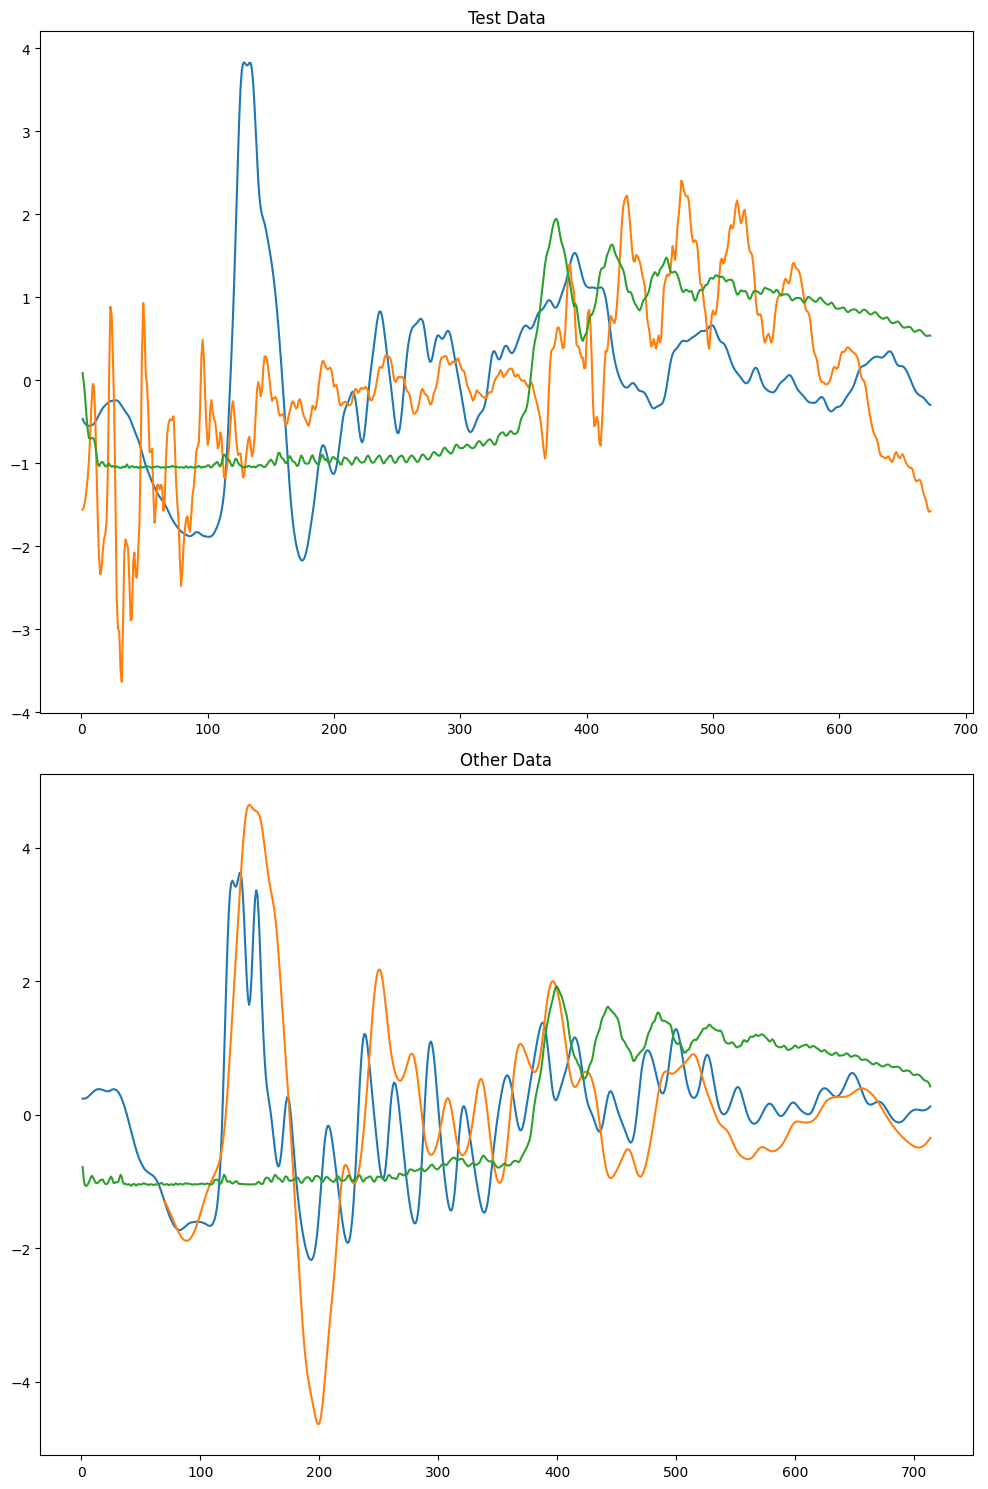

In [60]:
e = 69
import matplotlib.pyplot as plt

# Assuming test_1_transpose, test_2_transpose, test_3_transpose, pd_transpose, pin_transpose, and po_transpose are DataFrame objects
# Assuming you've already defined e and imported necessary libraries

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Plot on the first subplot
x = test_1_transpose.index
y = test_1_transpose.iloc[:, e]
y1 = test_2_transpose.iloc[:, e]
y2 = test_3_transpose.iloc[:, e]

axs[0].plot(x, y)
axs[0].plot(x, y1)
axs[0].plot(x, y2)
axs[0].set_title('Test Data')

# Plot on the second subplot
a = pd_transpose.index
b = pd_transpose.iloc[:, e]
b1 = pd_data_mv10.iloc[:, e]
b2 = po_transpose.iloc[:, e]

axs[1].plot(a, b)
axs[1].plot(a, b1)
axs[1].plot(a, b2)
axs[1].set_title('Other Data')

plt.tight_layout()
plt.show()


C:\Users\uzubair\AppData\Local\Temp\ipykernel_89392\3210537347.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing between subplots


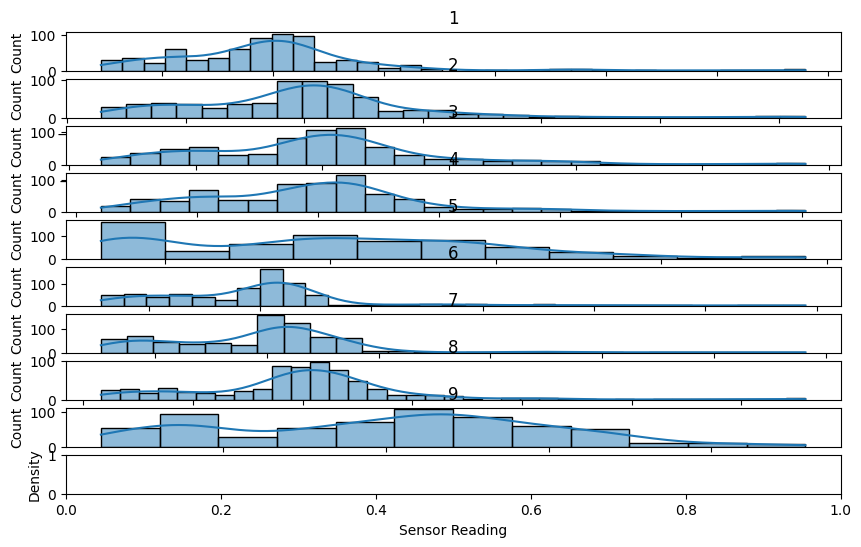

In [49]:

# Create a new figure to hold subplots
fig, axes = plt.subplots(nrows=sensor_data_1.shape[1], ncols=1, figsize=(10, 6))  # Adjust figsize as needed

# Loop through each column (excluding the first if it's the label)
for i, col in enumerate(sensor_data_1.columns[1:]):  # Skip the first column (assuming label)
  sns.histplot(sensor_data_1[col], kde=True, ax=axes[i])  # Plot histogram and KDE on each subplot
  axes[i].set_title(col)  # Set title as the column name

# Optional: Adjust layout and appearance
plt.tight_layout()  # Adjust spacing between subplots
plt.xlabel("Sensor Reading")
plt.ylabel("Density")
plt.show()

In [19]:
import numpy as np

# Calculate Z-scores
df_1['z_score'] = (df_1['column_name'] - df_1['column_name'].mean()) / df_1['column_name'].std()

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3
outliers_z = df_1[np.abs(df_1['z_score']) > threshold]


count    7.190000e+02
mean     8.344923e-09
std      1.000000e+00
min     -1.594388e+00
25%     -6.124565e-01
50%     -2.282000e-02
75%      3.169980e-01
max      4.548120e+00
Name: 0, dtype: float64